In [1]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import numpy as np

In [2]:
img = cv2.imread("E:/murugesan/Downloads/rarara.jpeg")
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

***EDGE DETECTION USING SOBEL FILTER***

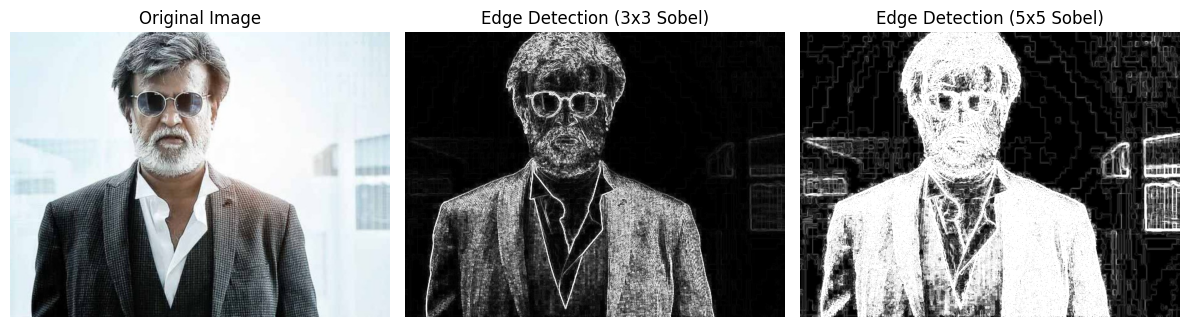

In [17]:
def sobel(gray, image_rgb):  
    sobel_3x = np.array([[-1, 0, 1],
                         [-2, 0, 2],
                         [-1, 0, 1]], dtype=np.float32)

    sobel_3y = np.array([[-1, -2, -1],
                         [ 0,  0,  0],
                         [ 1,  2,  1]], dtype=np.float32)

    # Sobel 5x5
    sobel_5x = np.array([[-2, -1, 0, 1, 2],
                         [-3, -2, 0, 2, 3],
                         [-4, -3, 0, 3, 4],
                         [-3, -2, 0, 2, 3],
                         [-2, -1, 0, 1, 2]], dtype=np.float32)

    sobel_5y = np.array([[-2, -3, -4, -3, -2],
                         [-1, -2, -3, -2, -1],
                         [ 0,  0,  0,  0,  0],
                         [ 1,  2,  3,  2,  1],
                         [ 2,  3,  4,  3,  2]], dtype=np.float32)

    # Apply Sobel filters
    grad_x_3 = cv2.filter2D(gray, cv2.CV_64F, sobel_3x)
    grad_y_3 = cv2.filter2D(gray, cv2.CV_64F, sobel_3y)
    grad_x_5 = cv2.filter2D(gray, cv2.CV_64F, sobel_5x)
    grad_y_5 = cv2.filter2D(gray, cv2.CV_64F, sobel_5y)

    # Compute gradient magnitude
    grad_mag_3 = cv2.convertScaleAbs(np.sqrt(grad_x_3**2 + grad_y_3**2))
    grad_mag_5 = cv2.convertScaleAbs(np.sqrt(grad_x_5**2 + grad_y_5**2))

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(image_rgb)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(grad_mag_3, cmap='gray')
    plt.title('Edge Detection (3x3 Sobel)')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(grad_mag_5, cmap='gray')
    plt.title('Edge Detection (5x5 Sobel)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
sobel(gray, image_rgb)


In [6]:
def apply_filters(image, noise_name, kernel_size=3):
    pad = kernel_size // 2
    padded_image = np.pad(image, pad, mode='constant', constant_values=0)
    filtered_images = {}

    for filter_type in ["Arithmetic", "Geometric", "Harmonic", "Median", "Midpoint", "Min", "Max"]:
        filtered_image = np.zeros_like(image, dtype=np.float64)

        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                neighborhood = padded_image[i:i + kernel_size, j:j + kernel_size]

                if filter_type == "Arithmetic":
                    filtered_image[i, j] = np.mean(neighborhood)

                elif filter_type == "Geometric":
                    product = np.prod(neighborhood)
                    filtered_image[i, j] = product**(1/(kernel_size**2)) if product > 0 else 1

                elif filter_type == "Harmonic":
                    filtered_image[i, j] = kernel_size**2 / np.sum(1.0 / (neighborhood + 1e-5))

                elif filter_type == "Median":
                    filtered_image[i, j] = np.median(neighborhood)

                elif filter_type == "Midpoint":
                    filtered_image[i, j] = (np.max(neighborhood) + np.min(neighborhood)) / 2

                elif filter_type == "Min":
                    filtered_image[i, j] = np.min(neighborhood)

                elif filter_type == "Max":
                    filtered_image[i, j] = np.max(neighborhood)

        filtered_images[filter_type] = np.clip(filtered_image, 0, 255).astype(np.uint8)


    # Start plotting using plt.subplot()
    plt.figure(figsize=(15, 10))
    plt.suptitle(f'{noise_name} Noise - Filtering Results', fontsize=14)

    # Show Original Image
    plt.subplot(3, 3, 1)
    plt.imshow(gray,cmap='gray')
    plt.title("Original")
    plt.axis("off")

    # Show Noisy Image
    plt.subplot(3, 3, 2)
    plt.imshow(image,cmap='gray')
    plt.title(f"{noise_name} Noise")
    plt.axis("off")

    # Show Filtered Images
    filter_names = list(filtered_images.keys())
    for i, filter_name in enumerate(filter_names):
        plt.subplot(3, 3, i + 3)
        plt.imshow(filtered_images[filter_name],cmap='gray')
        plt.title(filter_name)
        plt.axis("off")

    plt.tight_layout()
    plt.show()


***Gaussian noise add***

C:\Users\murugesan\AppData\Local\Temp\ipykernel_10672\1202685920.py:27: RuntimeWarning: overflow encountered in scalar add
  filtered_image[i, j] = (np.max(neighborhood) + np.min(neighborhood)) / 2


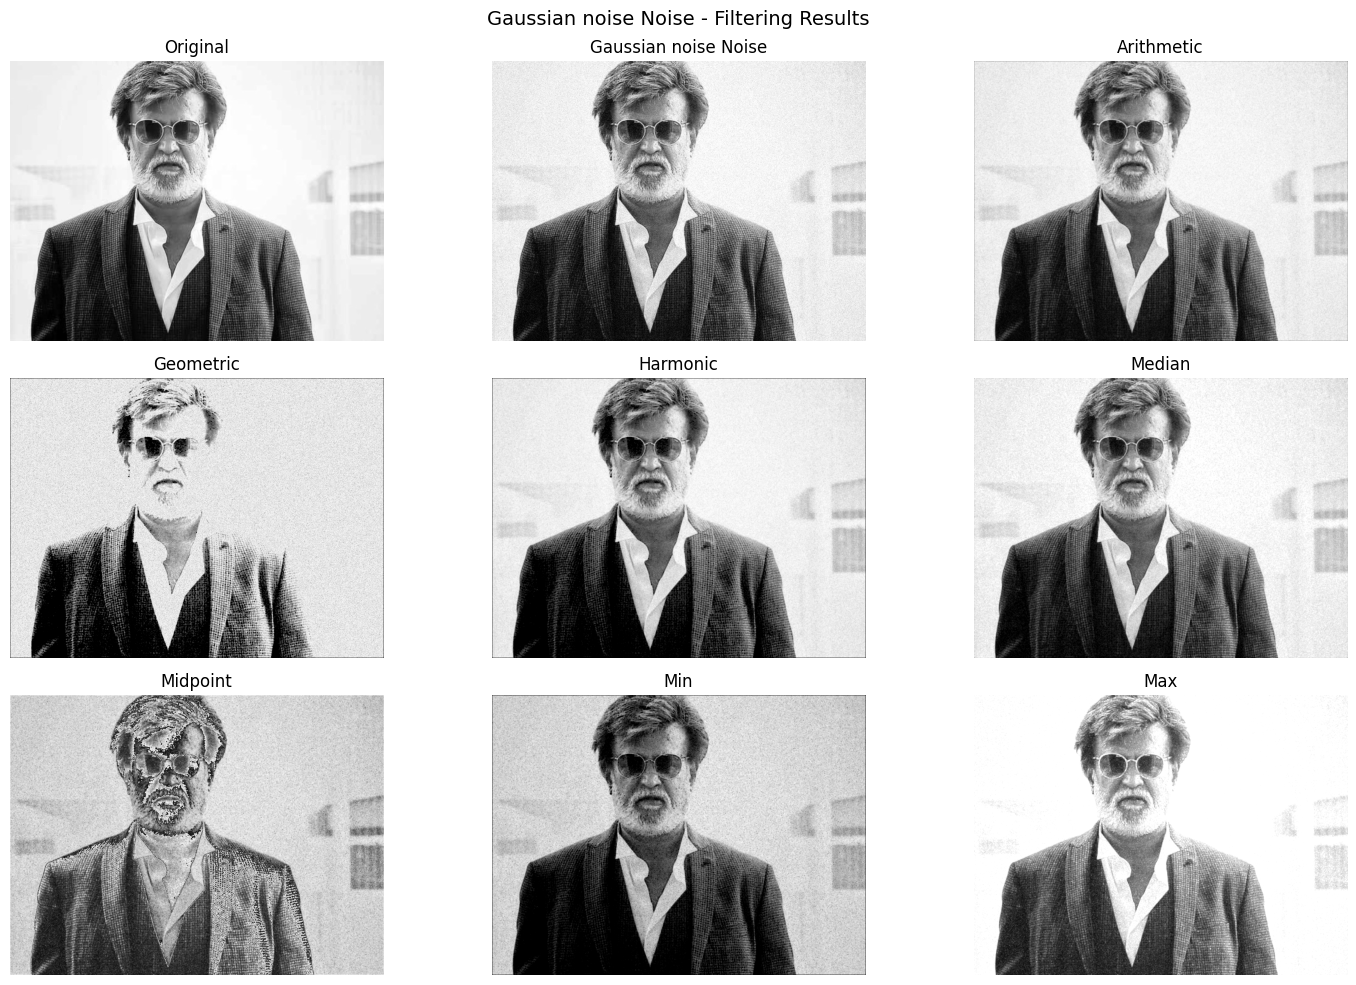

In [7]:
noise = np.random.normal(0, 20, gray.shape)  # Adjust standard deviation (20) as needed
noisy_img = gray + noise
noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8) 
apply_filters(noisy_img, "Gaussian noise", kernel_size=3)

***Salt and Pepper noise***

C:\Users\murugesan\AppData\Local\Temp\ipykernel_10672\1202685920.py:27: RuntimeWarning: overflow encountered in scalar add
  filtered_image[i, j] = (np.max(neighborhood) + np.min(neighborhood)) / 2


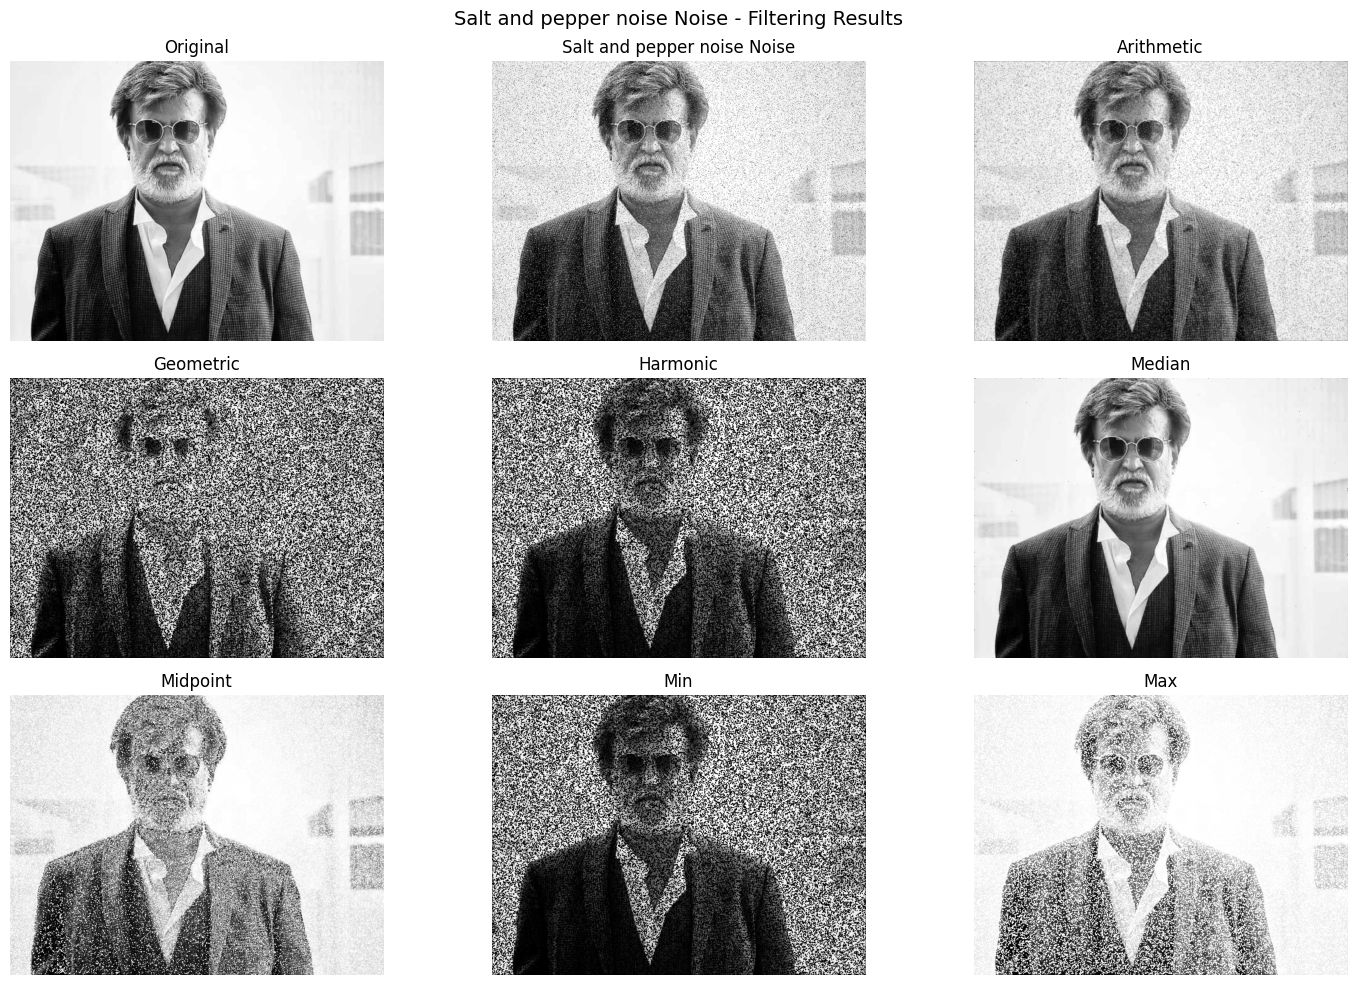

In [12]:
def add_salt_pepper_noise(noisy_img_rgb, prob=0.02):
    noisy_image = noisy_img_rgb.copy()
    total_pixels = noisy_img_rgb.size
    num_salt = int(prob * total_pixels / 2)
    num_pepper = int(prob * total_pixels / 2)
    salt_coords = [np.random.randint(0, i - 1, num_salt) for i in noisy_img_rgb.shape]
    noisy_image[salt_coords[0], salt_coords[1]] = 255  
    pepper_coords = [np.random.randint(0, i - 1, num_pepper) for i in noisy_img_rgb.shape]
    noisy_image[pepper_coords[0], pepper_coords[1]] = 0  
    return noisy_image
noisy_image = add_salt_pepper_noise(noisy_img_rgb)
noisy_img_rgb = cv2.cvtColor(noisy_img, cv2.COLOR_BGR2GRAY)

apply_filters(noisy_img_rgb, "Salt and pepper noise", kernel_size=3)

***Adding uniform noise***

C:\Users\murugesan\AppData\Local\Temp\ipykernel_10672\1202685920.py:27: RuntimeWarning: overflow encountered in scalar add
  filtered_image[i, j] = (np.max(neighborhood) + np.min(neighborhood)) / 2


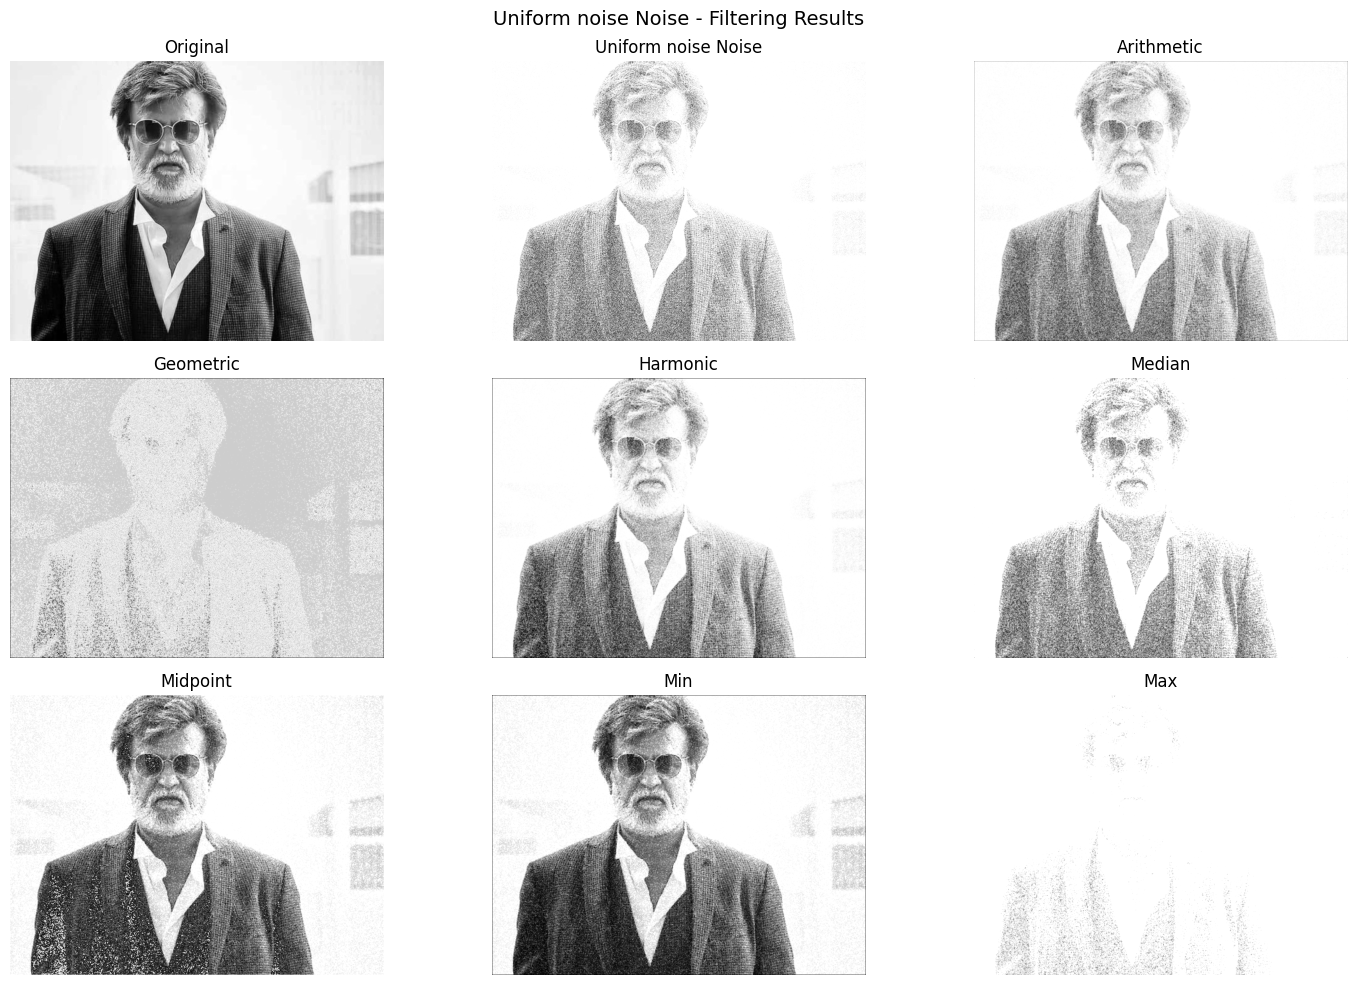

In [13]:
min_val=0
max_val=255
noise=np.random.uniform(min_val,max_val,gray.shape).astype(np.uint8)
noisy_image=cv2.add(gray,noise)
noisy_image=np.clip(noisy_image,0,255).astype(np.uint8)
apply_filters(noisy_image, "Uniform noise", kernel_size=3)

***Rayleigh noise***

C:\Users\murugesan\AppData\Local\Temp\ipykernel_10672\1202685920.py:27: RuntimeWarning: overflow encountered in scalar add
  filtered_image[i, j] = (np.max(neighborhood) + np.min(neighborhood)) / 2


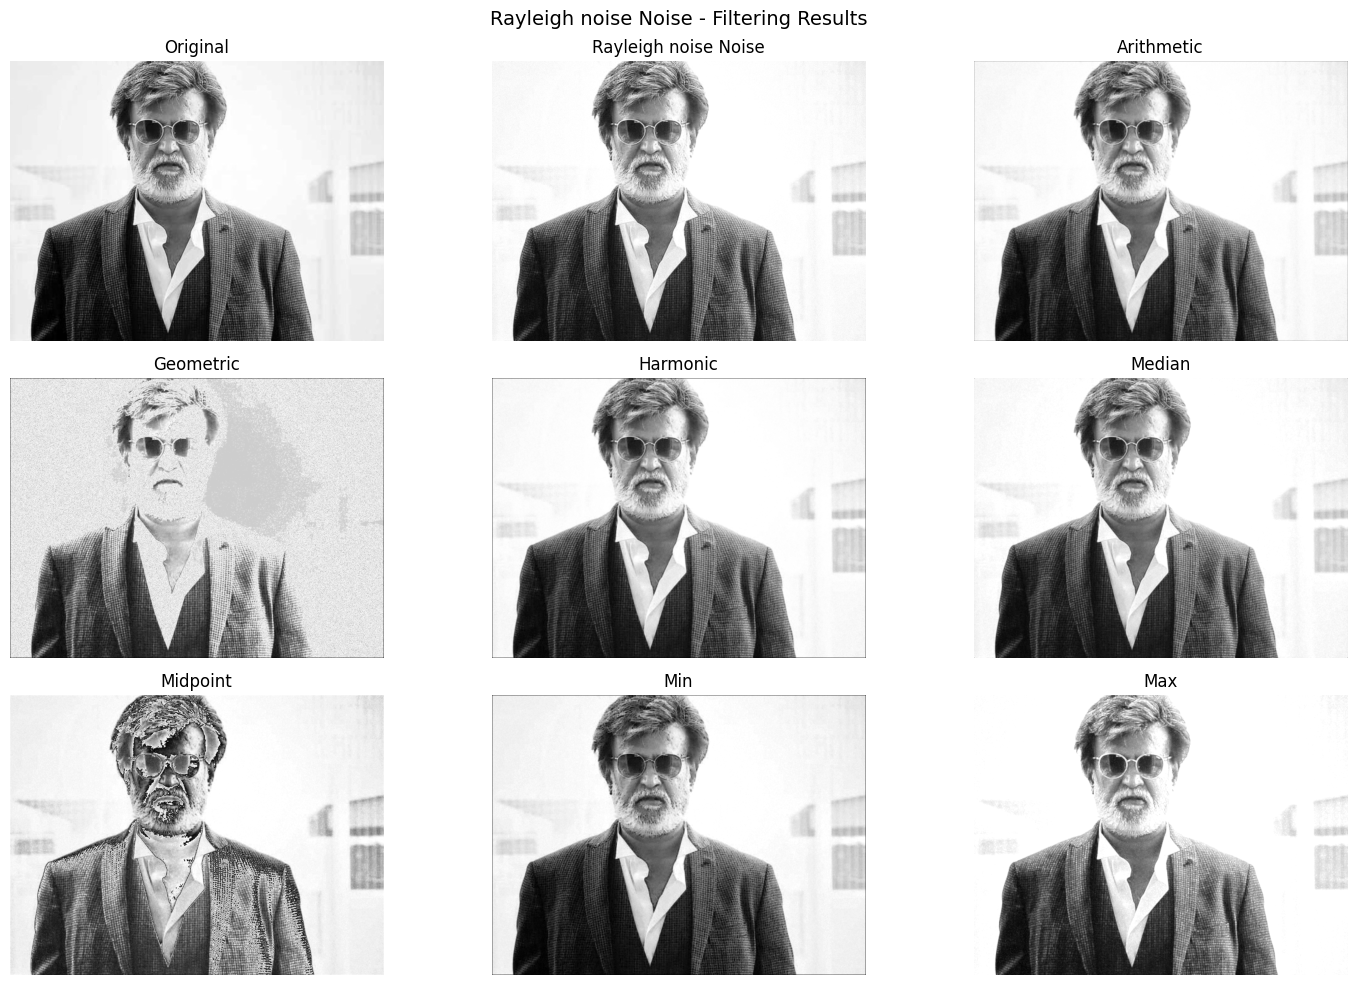

In [14]:
scale=10
noise = np.random.rayleigh(scale, size=gray.shape)
noisy_image = gray + noise
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
apply_filters(noisy_image, "Rayleigh noise", kernel_size=3)

***Exponential noise***

C:\Users\murugesan\AppData\Local\Temp\ipykernel_10672\1202685920.py:27: RuntimeWarning: overflow encountered in scalar add
  filtered_image[i, j] = (np.max(neighborhood) + np.min(neighborhood)) / 2


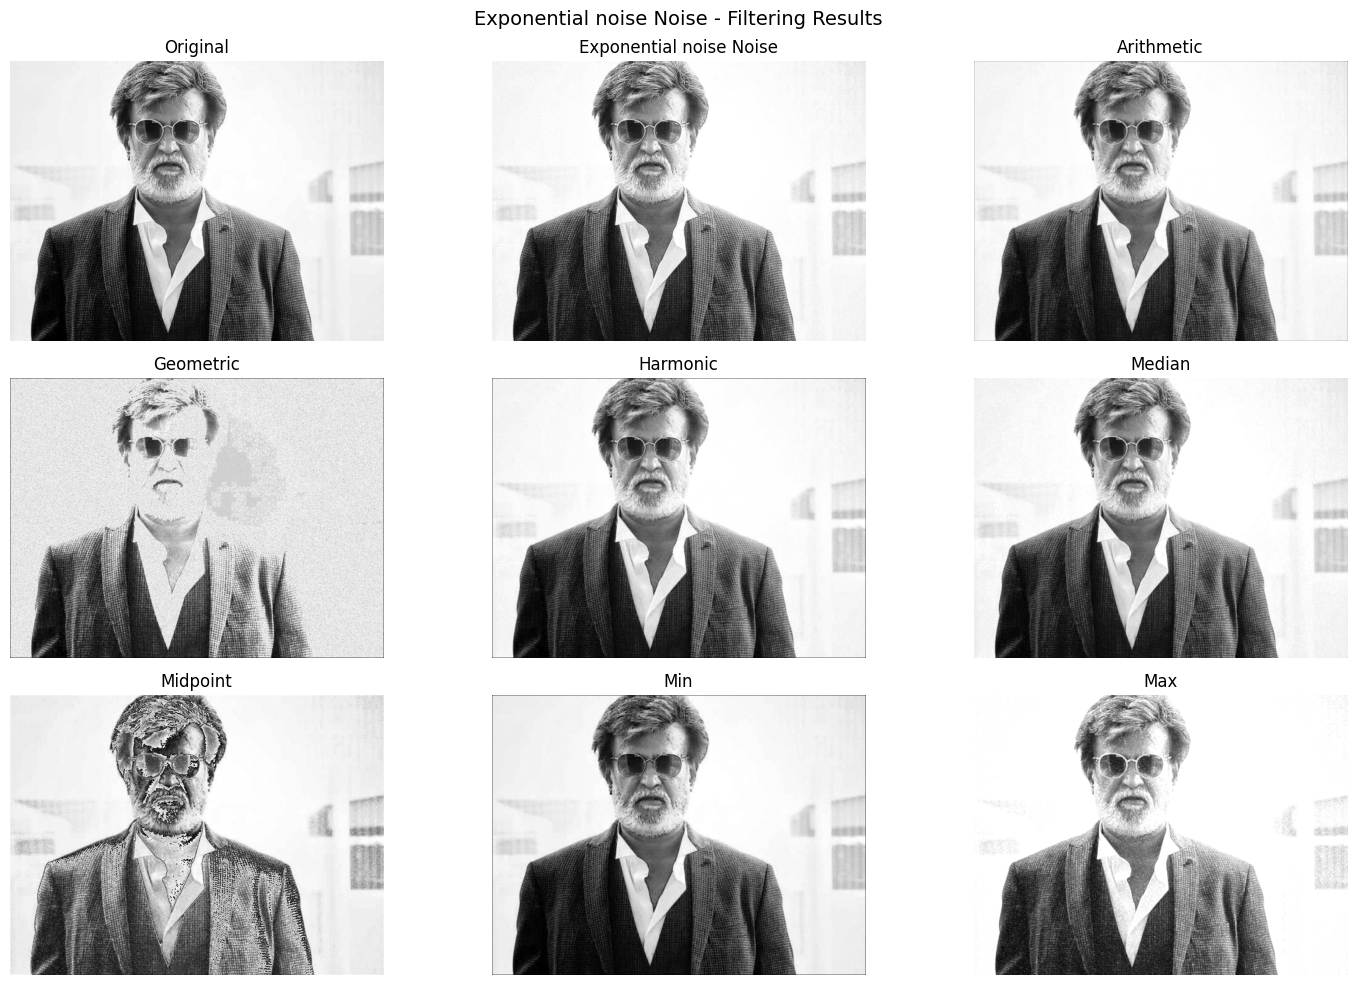

In [15]:
lambda_param=0.1
noise = np.random.exponential(scale=1/lambda_param, size=gray.shape)
noisy_image = gray + noise
noisy_img_exponential = np.clip(noisy_image, 0, 255).astype(np.uint8)
apply_filters(noisy_img_exponential, "Exponential noise", kernel_size=3)

***Gamma noise***

C:\Users\murugesan\AppData\Local\Temp\ipykernel_10672\1202685920.py:27: RuntimeWarning: overflow encountered in scalar add
  filtered_image[i, j] = (np.max(neighborhood) + np.min(neighborhood)) / 2


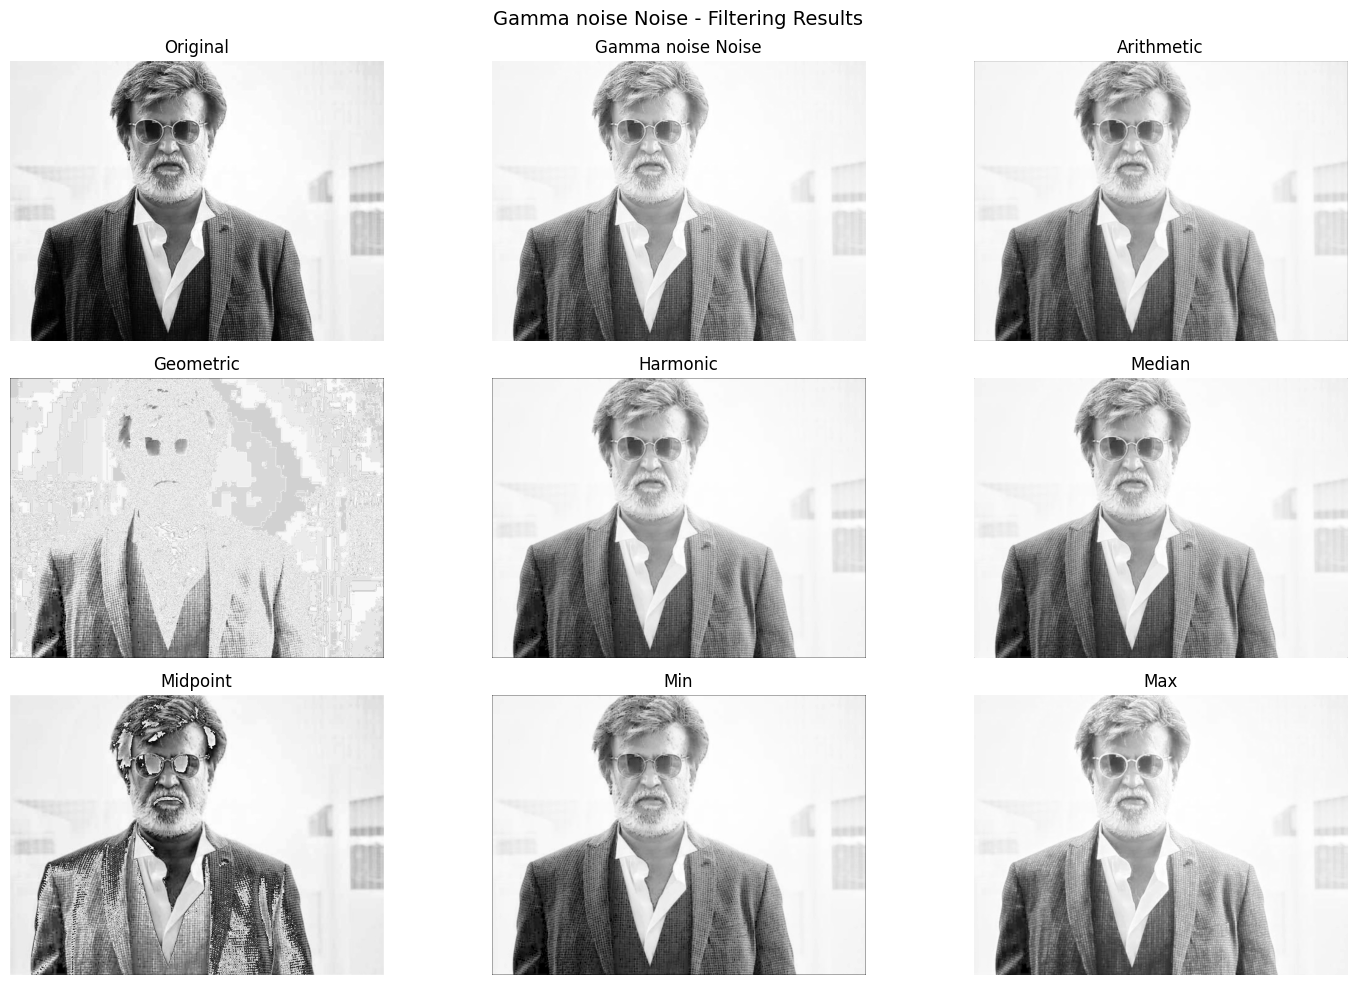

In [16]:
gamma = 0.5
noisy_image = np.power(gray / 255.0, gamma) * 255.0
noisy_image_gamma = np.clip(noisy_image, 0, 255).astype(np.uint8)

apply_filters(noisy_image_gamma, "Gamma noise", kernel_size=3)